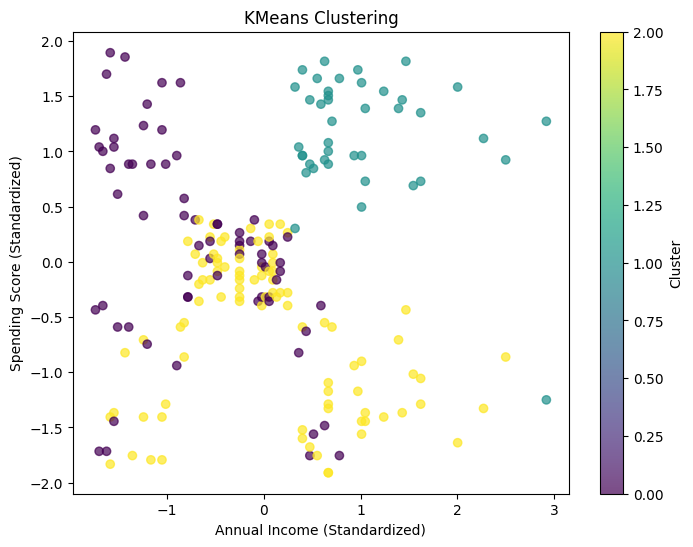

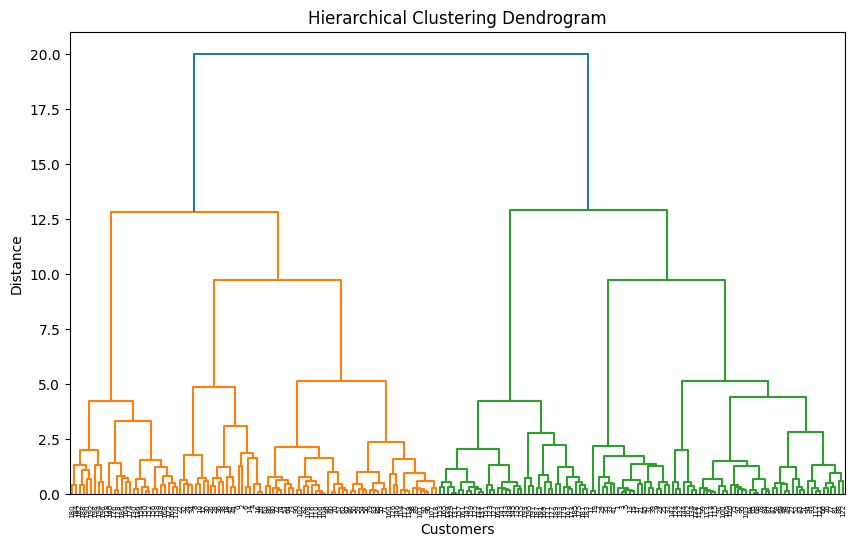

KMeans Silhouette Score: 0.36
Hierarchical Clustering Silhouette Score: 0.32


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

df = pd.read_csv('Mall_Customers.csv')

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

linkage_matrix = linkage(X_scaled, method='ward')
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=3, criterion='maxclust')

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10,6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

kmeans_silhouette = silhouette_score(X_scaled, df['KMeans_Cluster'])
hierarchical_silhouette = silhouette_score(X_scaled, df['Hierarchical_Cluster'])

print(f'KMeans Silhouette Score: {kmeans_silhouette:.2f}')
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.2f}')